# Least squares

In the world of science and engineering, you often encounter data that appears chaotic or noisy. However, behind this apparent confusion may lie fundamental patterns and relationships you can reveal using the techniques you’ve developed. In this topic, you will explore how the pseudoinverse becomes the driving engine behind the least squares method, an essential technique for fitting models to data.

You’ll take advantage of your mathematical skills to interpret the least squares problem in matrix form. Although the problem arises naturally in 2 dimensions, your knowledge of linear algebra will allow you to reformulate it in its most general context. You’ll develop a criterion to determine the best possible solution for the pseudoinverse, so now you’ll only reap the fruits of your effort. It’s time to transition from theory to practice!

## A cloud of points

Suppose you have $n$ data points in the plane $(x_1, y_1), (x_2, y_2), \ldots, (x_n, y_n)$. Suppose these data represent the money invested in advertising and the corresponding profits earned by various companies in some industry. A reasonable assumption would be that the more you invest in advertising, the more profits are generated, so you could start your research assuming that the relationship between the two has a linear trend:

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Paste the extracted data here (matrix provided below)
data = np.array([
[-2.000000, -6.000000],
[-0.439009, -5.976424],
[-0.127700, -5.834971],
[-1.172808, -4.821218],
[0.312579, -4.797642],
[1.512560, -4.750491],
[0.887294, -4.703340],
[1.606397, -4.656189],
[2.693439, -4.632614],
[1.324178, -4.561887],
[2.474493, -4.468010],
[0.949421, -4.444434],
[4.531158, -4.374494],
[2.405266, -4.280618],
[1.928322, -4.256358],
[4.030131, -4.209207],
[2.908761, -4.114715],
[4.313298, -4.091139],
[3.027142, -3.996647],
[2.165679, -3.926322],
[1.427074, -3.879171],
[3.523347, -3.855595],
[2.588884, -3.761103],
[1.540606, -3.690778],
[3.735869, -3.667202],
[1.769497, -3.572710],
[4.423119, -3.502385],
[3.539413, -3.431746],
[1.984379, -3.384595],
[0.826979, -3.337444],
[4.024789, -3.266718],
[2.941485, -3.196393],
[1.553298, -3.148927],
[3.341243, -3.125351],
[4.476124, -3.078200],
[2.247586, -2.983709],
[3.566732, -2.912982],
[1.041499, -2.818491],
[4.294381, -2.771340],
[2.559163, -2.724189],
[1.862612, -2.653462],
[3.732475, -2.606311],
[4.499689, -2.535585],
[2.462116, -2.488120],
[3.275040, -2.417394],
[1.009806, -2.370243],
[4.273672, -2.299517],
[2.979778, -2.228790],
[3.712915, -2.157750],
[1.617897, -2.086710],
[2.308622, -2.015984],
[3.097953, -1.945257],
[4.320262, -1.827925],
[2.451994, -1.757199],
[3.516693, -1.686159],
[1.085814, -1.615433],
[4.099907, -1.544706],
[2.773748, -1.473980],
[3.214690, -1.402940],
[1.674512, -1.331900],
[2.358693, -1.261174],
[4.472711, -1.143842],
[3.288929, -1.072802],
[2.020728, -1.001762],
[0.857807, -0.954611],
[4.280152, -0.812518],
[2.932150, -0.765367],
[3.510024, -0.694640],
[1.110535, -0.647489],
[2.348415, -0.576763],
[4.401259, -0.459431],
[3.157934, -0.388391],
[1.542320, -0.341240],
[2.720169, -0.270514],
[3.961604, -0.153182],
[2.566694, -0.082142],
[1.635979, -0.011102],
[4.443691, 0.082773],
[3.392153, 0.153499],
[2.266603, 0.247991],
[4.089724, 0.365323],
[3.040387, 0.436049],
[1.887111, 0.507089],
[2.931187, 0.601580],
[3.771291, 0.696072],
[4.434355, 0.767112],
[2.580735, 0.861604],
[1.523961, 0.956095],
[3.281575, 1.050587],
[2.139517, 1.145079],
[3.712813, 1.239570]
])

# Split into x, y
x = data[:,0]
y = data[:,1]

# Scatter plot
plt.figure(figsize=(10,6))
plt.scatter(x, y, color="red", s=20)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Reconstructed Scatterplot from Extracted Image Data")
plt.grid(True, linestyle="--", linewidth=0.5, alpha=0.6)
plt.show()


In an ideal case, all the points are on the same line. As any line is determined by its slope
$m$ and intercept $b$, the problem translates into finding the numbers $m$ and $b$ satisfying the linear system of equations:

$$
\begin{aligned}
y_1 &= m x_1 + b \\
y_2 &= m x_2 + b \\
&\;\vdots \\
y_n &= m x_n + b
\end{aligned}
$$

But there are too many equations with only two variables. So, it's unlikely that the system has a solution. Geometrically, this means there's no line that fits the raw data perfectly. The best line to describe this dataset isn't the one going through the points but the one that outlines the way this set is directed or oriented its increasing/decreasing pattern in the best manner. As
$y$ is expressed in terms of $y$, we say that
$x$ is a **predictor** and that $y$ is the **target**. Before thinking about a way to attack this problem, let's look at this problem in larger dimensions.
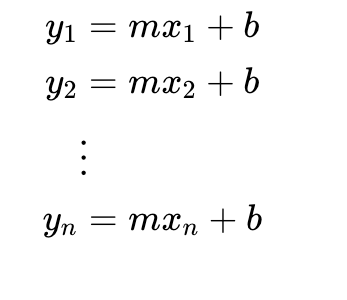

## The general problem

Now, suppose you're given $n$ data points in the space $(x_1, y_1, z1). (x_2, y_2, z_2), ..., (x_n, y_n, z_n)$. Your goal is to find a plane that best approximates all these points:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# -----------------------------------------------------------------------------
# Generate sample data
# -----------------------------------------------------------------------------
np.random.seed(0)
n = 50
x = np.random.uniform(-1, 1, n)
y = np.random.uniform(-1, 1, n)
z = np.random.uniform(-5, 5, n)

# -----------------------------------------------------------------------------
# Configure figure
# -----------------------------------------------------------------------------
fig = plt.figure(figsize=(14, 7))
ax = fig.add_subplot(111, projection='3d')

# White background
fig.patch.set_facecolor('blue')
ax.set_facecolor('blue')

# -----------------------------------------------------------------------------
# Scatter plot
# -----------------------------------------------------------------------------
ax.scatter(x, y, z, color='purple', s=80)

# -----------------------------------------------------------------------------
# Axis labels
# -----------------------------------------------------------------------------
ax.set_xlabel('x', fontsize=12)
ax.set_ylabel('y', fontsize=12)
ax.set_zlabel('z', fontsize=12)

# -----------------------------------------------------------------------------
# Match viewing angle
# -----------------------------------------------------------------------------
ax.view_init(elev=15, azim=-75)

# Axis limits similar to your plot
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-5, 5)

plt.tight_layout()
plt.show()

Analogously to the two-dimensional problem, this poses a system of equations:

$$
\begin{aligned}
z_1 &= m x_1 + l y_1+ b \\
y_2 &= m x_2 +l y_2 + b \\
&\;\vdots \\
z_n &= m x_n + ly_n + b
\end{aligned}
$$

So, the problem reduces to find the values of $m$, $l$ and $b$. When $n$ is a large number, it's nearly impossible that the system could have a solution. Again, since $z$ is expressed in terms of $x$ and $y$, $z$ is called the **target** while $x$ and $y$ are **predictors**.

You already know linear algebra, so you can work with the most general scenario involving many variables and linear equations. In general, you have
$n$ data points with $p$ predictors $x_1, x_2,..., x_p$ and a target $Y$.

Let $x_{ij}$ be the $i$-th observation of the $j$-th predictor and $y_i$ the $i$-th observation of the target for every $1 \le i \le n$ and $1 \le j \le p$. This implies that the data points have the form  $(x_{11}, x_{12}, \ldots, x_{1p}, y_1),\quad
(x_{21}, x_{22}, \ldots, x_{2p}, y_2),\quad \ldots,\quad(x_{n1}, x_{n2}, \ldots, x_{np}, y_n)$.

Under these conditions, the initial problem can be written as a linear system of equations:

$$\begin{aligned}
y_1 &= \beta_0 + \beta_1 x_{11} + \beta_2 x_{12} + \cdots + \beta_p x_{1p}, \\
y_2 &= \beta_0 + \beta_1 x_{21} + \beta_2 x_{22} + \cdots + \beta_p x_{2p}, \\
&\ \vdots \\
y_n &= \beta_0 + \beta_1 x_{n1} + \beta_2 x_{n2} + \cdots + \beta_p x_{np}.
\end{aligned}
$$

But as in lower dimensions, it is very unlikely that such a system (where $n$ is usually much larger than $p$) has any solutions. But not everything is lost. Let's see how you can get your way.



## An optimality criterion

You're working with a lot of variables and equations at the same time, and it's easy to get confused. Time to introduce some matrices!

$$
X =
\begin{pmatrix}
1 & x_{11} & x_{12} & \cdots & x_{1p} \\
1 & x_{21} & x_{22} & \cdots & x_{2p} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & x_{n1} & x_{n2} & \cdots & x_{np}
\end{pmatrix},
\qquad
\beta =
\begin{pmatrix}
\beta_0 \\
\beta_1 \\
\vdots \\
\beta_p
\end{pmatrix},
\qquad
y =
\begin{pmatrix}
y_1 \\
y_2 \\
\vdots \\
y_n
\end{pmatrix}.
$$

Thanks to them, the linear system becomes a simple matrix equation:

$$
X \beta = y.
$$

So, for any proposed vector of solutions $\hat{\beta}$, you get an approximation
$\hat{y} = X \hat{\beta}$ to $y$.
Since the system has no solution, it's clear that $\hat{y} \ne y$, so the distance
$\lVert y - \hat{y} \rVert$ between both vectors is non-zero. You can think of this distance as an error associated with $\hat{\beta}$.

In summary, for any $\hat{\beta}$, its associated **estimation error** is:

$$
e(\hat{\beta}) = \lVert y - X \hat{\beta} \rVert.
$$

The smaller the error, the better the approximation. This suggests that the best parameter vector $\hat{\beta}$ is the one that minimizes
$e(\hat{\beta}) = \lVert y - X \hat{\beta} \rVert$.

But then you might be wondering if there even exists a unique vector with this property, and worse, how can you find it?
Don't worry, this is precisely the problem that the pseudoinverse solves!

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# 1. Generate synthetic data
np.random.seed(42)   # for reproducibility

n = 100
x = np.random.uniform(-2, 5, n)          # x values in the same range as your plot
noise = np.random.normal(0, 1.2, n)      # random noise
y = 1.1 * x + 0.5 + noise                # linear relationship with noise

# Reshape for sklearn
X = x.reshape(-1, 1)

# 2. Fit a linear regression line
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# 3. Plot
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='red', s=20)
plt.plot(x, y_pred, linewidth=2)

plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.tight_layout()
plt.show()


Recall you are given $X$ and $y$, think about them as fixed.
Your goal is to compute $\hat{\beta}$.

With it, you can estimate the target values as

$$
\hat{y} = X \hat{\beta}.
$$

## The best approximation

Well, as you already know, the vector you're looking for is simply:

$$
\hat{\beta} = X^{\dagger} y
$$

where $X^{\dagger}$ is the pseudoinverse of $X$.
This is because
$$\lVert X \hat{\beta} - y \rVert \le \lVert X \beta - y \rVert$$
for any other $\beta$.
In our current problem, this means that
$$e(\hat{\beta}) \le e(\beta).$$

Once you've computed the best parameter vector, you can estimate the target:

$$
\hat{y} = X X^{\dagger} y = X \hat{\beta}.
$$

Before putting the theory to work, let's discuss one more point.
The vector $\hat{y}$ is the closest to $y$ among all the vectors in the column space of $X$.
Actually, this is the orthogonal projection of $\hat{y}$ onto the column space of $X$.
Thus, by multiplying the vector $\hat{y}$ by the matrix $X X^{\dagger}$ you obtain its projection.

For this reason,
$$H = X X^{\dagger}$$
is known as the **projection matrix**.

- In the standard approach, the optimization process is carried out through derivatives.
  Specifically, the error function is minimized through the second derivative, which is tedious.

- Furthermore, in the standard approach, the error is not minimized directly, but rather the *quadratic* error —
  this is done because the quadratic error is easier to derive.

- For the standard approach to work, it is usually assumed that the columns of $X$ are linearly independent.
  In these circumstances, the projection matrix is reduced to $y$.
  When you have many predictors, this can easily fail, and other problems arise.
  In our strategy, we do not suffer from this problem, and the projection matrix is much easier to remember.

- The least squares method is usually derived by the usage of calculus,
  but we're introducing an alternative way of solving the problem, which is more straightforward.
  Actually, in statistics, this method allows you to go deeper.
  This allows you to estimate other parameters, perform hypothesis tests,
  and evaluate the quality of fit — all in a unified way.

## The best line

Let's start off with a simple example in two dimensions.
Suppose the data points are
$(-1, 3),\ (0, 1),\ (1, -1),\ (2, 2)$.

In order to find the best estimation, the first step is to identify the data matrix, the target values, and the parameters:

$$
X =
\begin{pmatrix}
1 & -1 \\
1 & 0 \\
1 & 1 \\
1 & 2
\end{pmatrix},
\qquad
y =
\begin{pmatrix}
3 \\
1 \\
-1 \\
2
\end{pmatrix},
\qquad
\beta =
\begin{pmatrix}
b \\
m
\end{pmatrix}.
$$

So, you're trying to find the closest thing to a solution for the system
$$X \beta = y.$$

Here, the key step is to compute the pseudoinverse of $X$.
Although it isn't necessary, you can also calculate the projection matrix:

$$
X^{\dagger}
= \frac{1}{10}
\begin{pmatrix}
4 & 3 & 2 & 1 \\
-3 & -1 & 1 & 3
\end{pmatrix},
\qquad
H = X X^{\dagger}
= \frac{1}{10}
\begin{pmatrix}
7 & 4 & 1 & -2 \\
4 & 3 & 2 & 1 \\
1 & 2 & 3 & 4 \\
-2 & 1 & 4 & 7
\end{pmatrix}.
$$

Now you have everything to calculate the parameter $\hat{\beta}$ and the corresponding estimate of $y$:

$$
\hat{\beta}
= X^{\dagger} y
= \frac{1}{2}
\begin{pmatrix}
3 \\
-1
\end{pmatrix},
\qquad
\hat{y}
= X \hat{\beta}
= \frac{1}{2}
\begin{pmatrix}
4 \\
3 \\
2 \\
1
\end{pmatrix}.
$$

In this case, the error is

$$
e(\hat{\beta}) = \lVert y - X \hat{\beta} \rVert \approx 2.73861.
$$

Then, the error associated with any other beta vector is greater than or equal to this value.
Geometrically, the slope of the best line is $-\frac{1}{2}$ and its intercept is $\frac{3}{2}$.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ----------------------------------------------------------
# DATA FROM THE EXAMPLE
# ----------------------------------------------------------
X_points = np.array([-1, 0, 1, 2])
y_points = np.array([3, 1, -1, 2])

# Best-fit parameters from your derivation
b = 1.5   # intercept
m = -0.5  # slope

# Compute fitted line over a smooth grid
x_line = np.linspace(-2, 3, 200)
y_line = b + m * x_line

# ----------------------------------------------------------
# PLOT
# ----------------------------------------------------------
plt.figure(figsize=(10, 6))

# Scatter points
plt.scatter(X_points, y_points, color='purple', s=120, label='Data points')

# Best-fit line
plt.plot(x_line, y_line, color='red', linewidth=2.5, label='Best-fit line')

# Aesthetic details
plt.title("Best Line from Pseudoinverse Solution", fontsize=20)
plt.xlabel("x", fontsize=14)
plt.ylabel("y", fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=14)

plt.xlim(-2, 3)
plt.ylim(-3, 4)

plt.tight_layout()
plt.show()

## The best plane

Now, let's move on to a slightly more realistic example.
There is more than one predictor, and the pseudoinverse doesn't look pretty.
The data points are
$(-3, -6, 16),\ (1, -4, 13),\ (0, 1, -3),\ (2, 5, -13),\ (5, 7, -18).$

As before, the required pieces are:

$$
X =
\begin{pmatrix}
1 & -3 & -6 \\
1 & 1 & -4 \\
1 & 0 & 1 \\
1 & 2 & 5 \\
1 & 5 & 7
\end{pmatrix},
\qquad
y =
\begin{pmatrix}
16 \\
13 \\
-3 \\
-13 \\
-18
\end{pmatrix},
\qquad
\beta =
\begin{pmatrix}
b \\
m \\
l
\end{pmatrix}.
$$

The corresponding pseudoinverse is

$$
X^{\dagger} =
\begin{pmatrix}
0.317 & 0.0539 & 0.294 & 0.258 & 0.0764 \\
-0.117 & 0.230 & -0.132 & -0.108 & 0.127 \\
-0.000357 & -0.140 & 0.0621 & 0.0835 & -0.00571
\end{pmatrix}.
$$

This implies that the projection matrix is then:

$$
H = X X^{\dagger}
=
\begin{pmatrix}
0.671 & 0.202 & 0.317 & 0.0814 & -0.271 \\
0.202 & 0.842 & -0.0857 & -0.184 & 0.226 \\
0.317 & -0.0857 & 0.357 & 0.342 & 0.0707 \\
0.0814 & -0.184 & 0.342 & 0.459 & 0.302 \\
-0.271 & 0.226 & 0.0707 & 0.302 & 0.672
\end{pmatrix}.
$$

Finally, the parameter vector and the corresponding best approximation are:

$$
\hat{\beta}
= X^{\dagger} y
=
\begin{pmatrix}
0.165 \\
0.629 \\
-2.99
\end{pmatrix},
\qquad
\hat{y}
= X \hat{\beta}
=
\begin{pmatrix}
16.2 \\
12.7 \\
-2.82 \\
-13.5 \\
-17.6
\end{pmatrix}.
$$
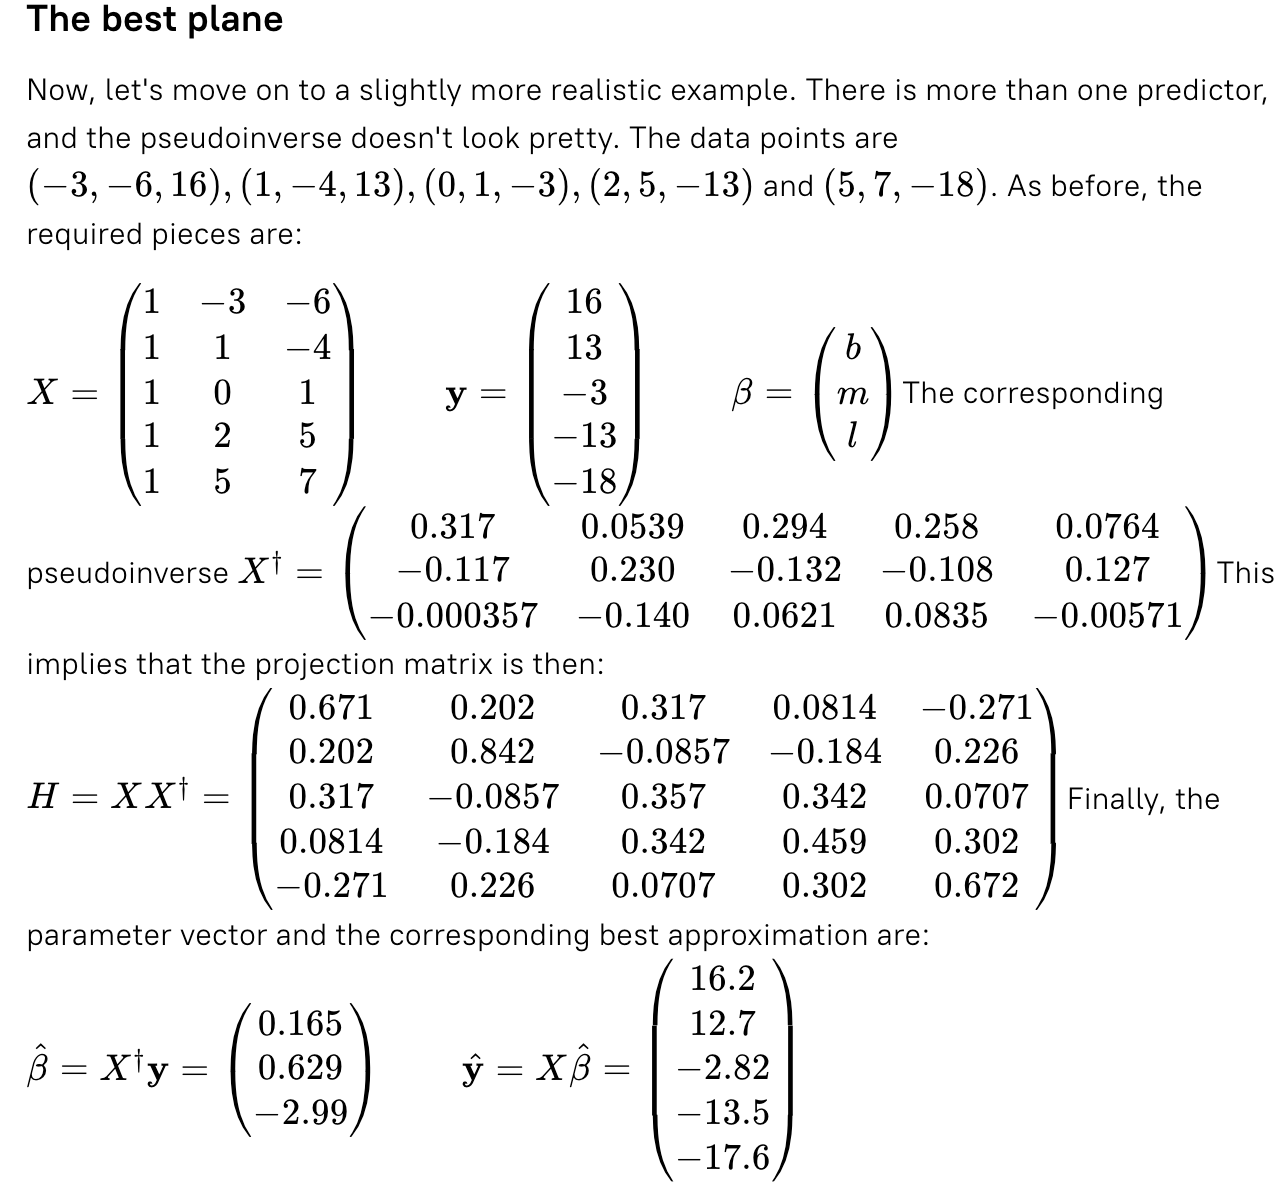

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401  (needed for 3D)

# ----------------------------------------------------------
# DATA: points (x, y, z)
# ----------------------------------------------------------
points = np.array([
    [-3, -6, 16],
    [ 1, -4, 13],
    [ 0,  1, -3],
    [ 2,  5, -13],
    [ 5,  7, -18],
])

x = points[:, 0]
y = points[:, 1]
z = points[:, 2]

# ----------------------------------------------------------
# PLANE PARAMETERS  z = b + m x + l y
# (from your pseudoinverse solution)
# ----------------------------------------------------------
b = 0.165
m = 0.629
l = -2.99

# Fitted z values (projection of points onto the plane)
z_hat = b + m * x + l * y

# ----------------------------------------------------------
# CREATE PLANE GRID
# ----------------------------------------------------------
x_grid = np.linspace(x.min() - 1, x.max() + 1, 30)
y_grid = np.linspace(y.min() - 1, y.max() + 1, 30)
Xg, Yg = np.meshgrid(x_grid, y_grid)
Zg = b + m * Xg + l * Yg

# ----------------------------------------------------------
# PLOT
# ----------------------------------------------------------
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Best-fit plane
ax.plot_surface(Xg, Yg, Zg, alpha=0.3, edgecolor='none', cmap='viridis')

# Original data points
ax.scatter(x, y, z, color='purple', s=80, label='Data points')

# Projected points on the plane
ax.scatter(x, y, z_hat, color='blue', marker='x', s=80, label='Projections on plane')

# Residual vectors (from projection on plane to actual point)
for xi, yi, zi, zhi in zip(x, y, z, z_hat):
    ax.plot([xi, xi], [yi, yi], [zhi, zi],
            color='black', linewidth=1.5)

# Labels and view
ax.set_title("Best-fit plane with residual vectors", fontsize=16)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.view_init(elev=20, azim=-60)

ax.legend()
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401


# ----------------------------------------------------------
# DATA
# ----------------------------------------------------------
points = np.array([
    [-3, -6, 16],
    [ 1, -4, 13],
    [ 0,  1, -3],
    [ 2,  5, -13],
    [ 5,  7, -18],
])

x = points[:, 0]
y = points[:, 1]
z = points[:, 2]

# Plane parameters  z = b + m x + l y
b = 0.165
m = 0.629
l = -2.99

# Plane grid
xg = np.linspace(x.min() - 1, x.max() + 1, 40)
yg = np.linspace(y.min() - 1, y.max() + 1, 40)
Xg, Yg = np.meshgrid(xg, yg)
Zg = b + m * Xg + l * Yg

# ----------------------------------------------------------
# PLOT
# ----------------------------------------------------------
fig = plt.figure(figsize=(14, 7))
ax = fig.add_subplot(111, projection='3d')

# Solid plane in brown, slight transparency, grid lines visible
ax.plot_surface(
    Xg, Yg, Zg,
    color=(0.6, 0.3, 0.0, 1.0),          # brown
    edgecolor='black',
    linewidth=0.3,
    alpha=0.9
)

# Data points
ax.scatter(x, y, z, s=60, color='#4a72b2')  # muted blue

# Label axes
ax.set_xlabel("First predictor", fontsize=12)
ax.set_ylabel("Second predictor", fontsize=12)
ax.set_zlabel("Target", fontsize=12)

# Clean, muted axes
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
ax.grid(color='gray', alpha=0.3)

# Camera angle similar to your image
ax.view_init(elev=20, azim=-120)

plt.tight_layout()
plt.show()

## Conclusion

- In the least squares problem, you have $n$ data points of $p$ predictors and a target variable
  $(x_{11}, x_{12}, \ldots, x_{1p}, y_1),\ (x_{21}, x_{22}, \ldots, x_{2p}, y_2),\ \ldots,\ (x_{n1}, x_{n2}, \ldots, x_{np}, y_n)$.

- Your meaningful goal is to find some linear function describing your data.
  The closest thing to a solution for the linear system $X\beta = y$ is an instrument you use to reach this goal.

- The best solution is the vector $\hat{\beta}$ whose error
  $e(\hat{\beta}) = \lVert y - X \hat{\beta} \rVert$
  is as small as possible.

- The best solution is given by $\hat{\beta} = X^{\dagger} y$ and the estimation for the target is
  $\hat{y} = X \hat{\beta}$.

## Example 1 - Assessing the error

Consider the least squares problem with:

$$
X =
\begin{pmatrix}
1 & -2 & 1 \\
1 & 1  & 2 \\
1 & 3  & 0 \\
1 & 0  & 1
\end{pmatrix},
\qquad
y =
\begin{pmatrix}
-2 \\
0 \\
3 \\
2
\end{pmatrix}.
$$

The pseudoinverse is given by:

$$
X^{\dagger}
=
\frac{1}{22}
\begin{pmatrix}
13 & -10 & 12 & 7 \\
-5 & 3 & 3 & -1 \\
-5 & 14 & -8 & -1
\end{pmatrix}.
$$

Compute the error with two decimal places.

In [ ]:
import numpy as np

X = np.array([
    [1, -2, 1],
    [1,  1, 2],
    [1,  3, 0],
    [1,  0, 1]
], dtype=float)

y = np.array([
    -2,
     0,
     3,
     2
], dtype=float)

import numpy as np

X_dagger = (1/22) * np.array([
    [13, -10, 12,  7],
    [-5,   3,  3, -1],
    [-5,  14, -8, -1]
], dtype=float)

In [ ]:
H = X @ X_dagger
H

In [ ]:
BETA = X_dagger @ y
BETA

In [ ]:
y_ = X @ BETA
y_